In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline 

In [2]:
sns.set_style("whitegrid")

In [3]:
dataset1 = pd.read_csv("red_wine.csv", sep = ";")
dataset2 = pd.read_csv("white_wine.csv", sep = ";")

In [4]:
dataset1["quality_label"] = dataset1["quality"].apply(lambda x: "low" if x <= 5 else "medium" if x<=7 else "high")
dataset2["quality_label"] = dataset2["quality"].apply(lambda x: "low" if x <= 5 else "medium" if x<=7 else "high")

In [5]:
dataset1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [6]:
dataset1['quality_label'] = pd.Categorical(dataset1['quality_label'], 
                                           categories=['low', 'medium', 'high'])

In [7]:
dataset2['quality_label'] = pd.Categorical(dataset2['quality_label'], 
                                           categories=['low', 'medium', 'high'])

In [8]:
dataset1['wine_type']  = "red"
dataset2['wine_type']  = "white"

In [9]:
dataset1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red


In [10]:
wines = pd.concat([dataset1, dataset2])

In [11]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red


In [12]:
#.sample lets us get a randomly selected sample from the dataset. frac = 1 means that the entire data set is returned
#reset_index drops the shuffled index and restores it starting from 0 
wines = wines.sample(frac = 1, random_state = 101).reset_index(drop = True)

In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6,medium,red
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6,medium,white
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,medium,white
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,medium,white
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,low,white


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lr = LabelEncoder()

In [16]:
wines["wine_type"] = lr.fit_transform(wines["wine_type"])
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6,medium,0
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6,medium,1
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,medium,1
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,medium,1
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,low,1


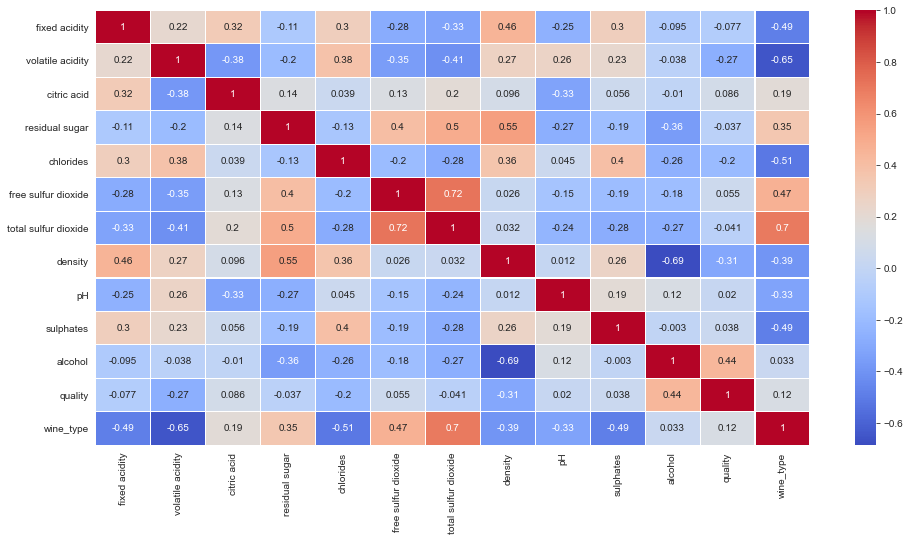

In [17]:
plt.figure(figsize = (16,8))
sns.heatmap(wines.corr(), annot = True,cmap="coolwarm",linewidths=.10)

In [18]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']

rw = round(dataset1[subset_attributes].describe(),2)
ww = round(dataset2[subset_attributes].describe(),2)

In [19]:
summay = pd.concat([rw,ww],axis =1 , keys = ["Red Wine Stats", "White Wine Stats"])
summay

Red Wine Stats                                                           \
      residual sugar total sulfur dioxide sulphates  alcohol volatile acidity   
count        1599.00              1599.00   1599.00  1599.00          1599.00   
mean            2.54                46.47      0.66    10.42             0.53   
std             1.41                32.90      0.17     1.07             0.18   
min             0.90                 6.00      0.33     8.40             0.12   
25%             1.90                22.00      0.55     9.50             0.39   
50%             2.20                38.00      0.62    10.20             0.52   
75%             2.60                62.00      0.73    11.10             0.64   
max            15.50               289.00      2.00    14.90             1.58   

               White Wine Stats                                          \
       quality   residual sugar total sulfur dioxide sulphates  alcohol   
count  1599.00          4898.00              4898.00   4898.00  4898.00   
mean      5.64             6.39               138.36      0.49    10.51   
std       0.81             5.07                42.50      0.11     1.23   
min       3.00             0.60                 9.00      0.22     8.00   
25%       5.00             1.70               108.00      0.41     9.50   
50%       6.00             5.20               134.00      0.47    10.40   
75%       6.00             9.90               167.00      0.55    11.40   
max       8.00            65.80               440.00      1.08    14.20   

                                 
      volatile acidity  quality  
count          4898.00  4898.00  
mean              0.28     5.88  
std               0.10     0.89  
min               0.08     3.00  
25%               0.21     5.00  
50%               0.26     6.00  
75%               0.32     6.00  
max               1.10     9.00

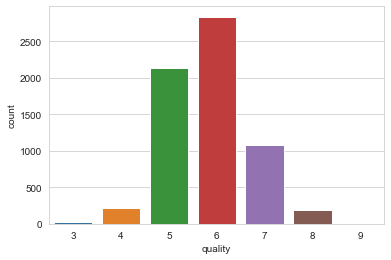

In [20]:
sns.countplot(x = "quality", data = wines)

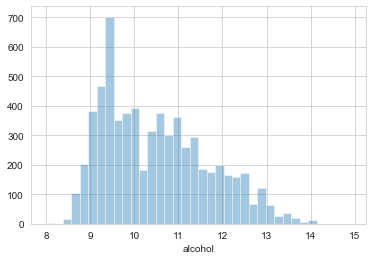

In [21]:
sns.distplot(a = wines["alcohol"], kde = False)

<Figure size 1152x576 with 0 Axes>

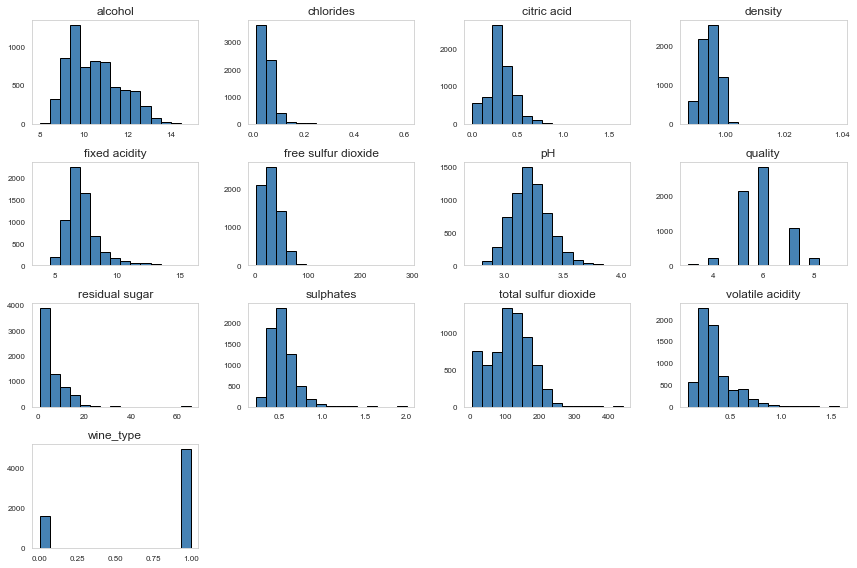

In [22]:
#on using a hist on the whole data set. it plots out histograms for every dataset it possible can 
plt.figure(figsize = (16,8))
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False) 
plt.tight_layout(rect=(0, 0, 2.0, 2.0))

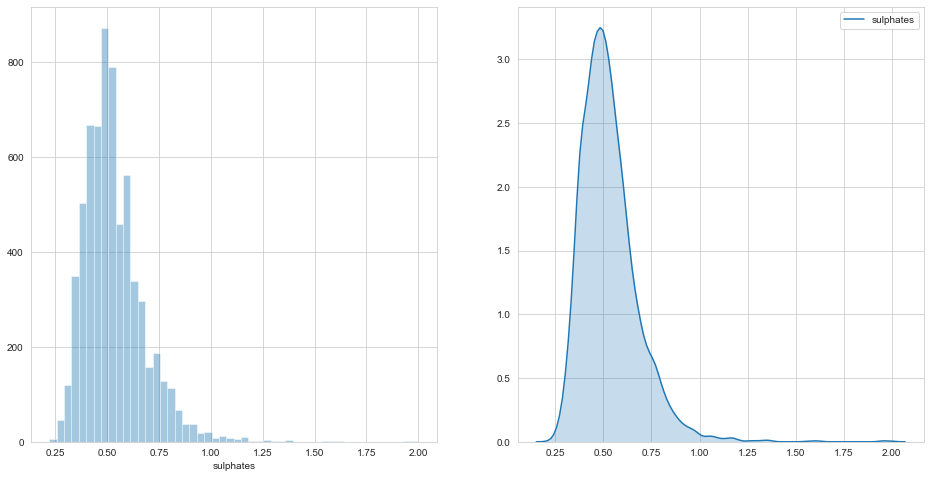

In [23]:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))

# axes[0].hist(wines['sulphates'])

sns.distplot(wines['sulphates'],ax = axes[0], kde = False)
sns.kdeplot(wines['sulphates'], shade = True)


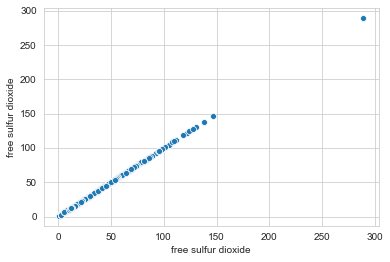

In [24]:
#checking a correlation between sulpher dioxides
sns.scatterplot(x = "free sulfur dioxide", y = "free sulfur dioxide", data = wines,)

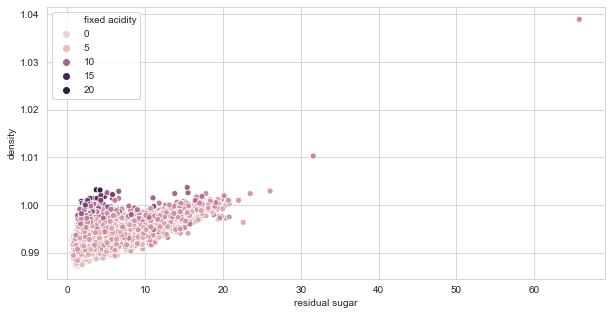

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "residual sugar", y = "density", data = wines, hue = "fixed acidity",)

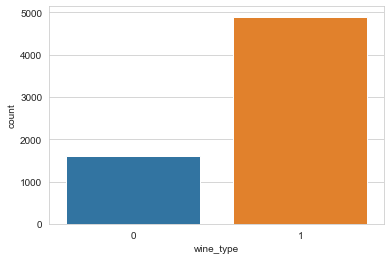

In [26]:
sns.countplot(x = "wine_type", data = wines)

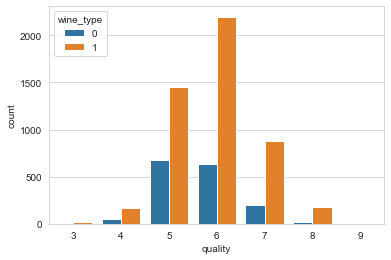

In [27]:
sns.countplot(x = "quality", data = wines, hue = "wine_type")

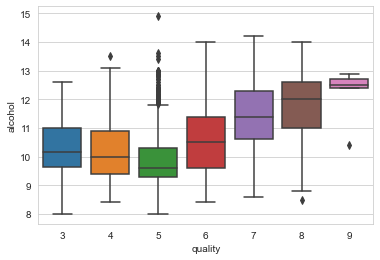

In [28]:
sns.boxplot(x = "quality", y = "alcohol", data = wines)

In [29]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6,medium,0
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6,medium,1
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,medium,1
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,medium,1
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,low,1


Text(0.5, 0, 'Alcohol')

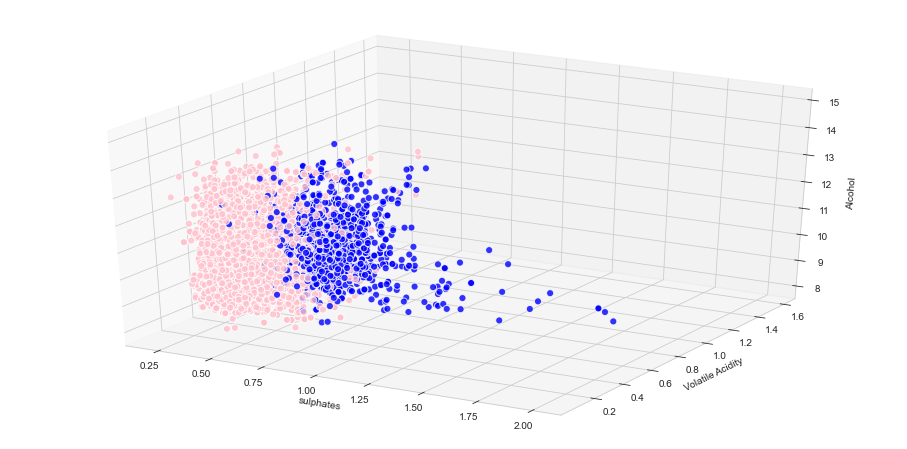

In [30]:
#visualizing 3-d plot 
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111,projection = "3d")
xs = wines["sulphates"]
ys = wines["volatile acidity"]
zs = wines["alcohol"] 
colors = ['pink' if wt == 1 else 'blue' for wt in list(wines['wine_type'])]

ax.scatter(xs, ys, zs, s=50, alpha=0.8, edgecolors='w',c = colors)
ax.set_xlabel('sulphates')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Alcohol')

In [31]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6,medium,0
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6,medium,1
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7,medium,1
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6,medium,1
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,low,1


In [32]:
data = wines.drop(["quality_label"], axis =1 )


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [34]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       330
           1       0.99      0.99      0.99       970

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [41]:
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cs = cross_val_score(lr, X_train, y_train, cv = 10)
print(cs.mean() * 100)
print(cs.std() * 100)

99.4228175485401
0.22754201584743836
